# Kaggle Competition - Quant & Machine Learning Course
# Tutorial 6: Linear Models for Regression

Modified based on resource https://github.com/amueller/ml-workshop-2-of-4/blob/master/notebooks/03%20-%20Linear%20Models%20for%20Regression.ipynb

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
sklearn.set_config(print_changed_only=True)

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
X, y = boston.data, boston.target

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
X.shape

(506, 13)

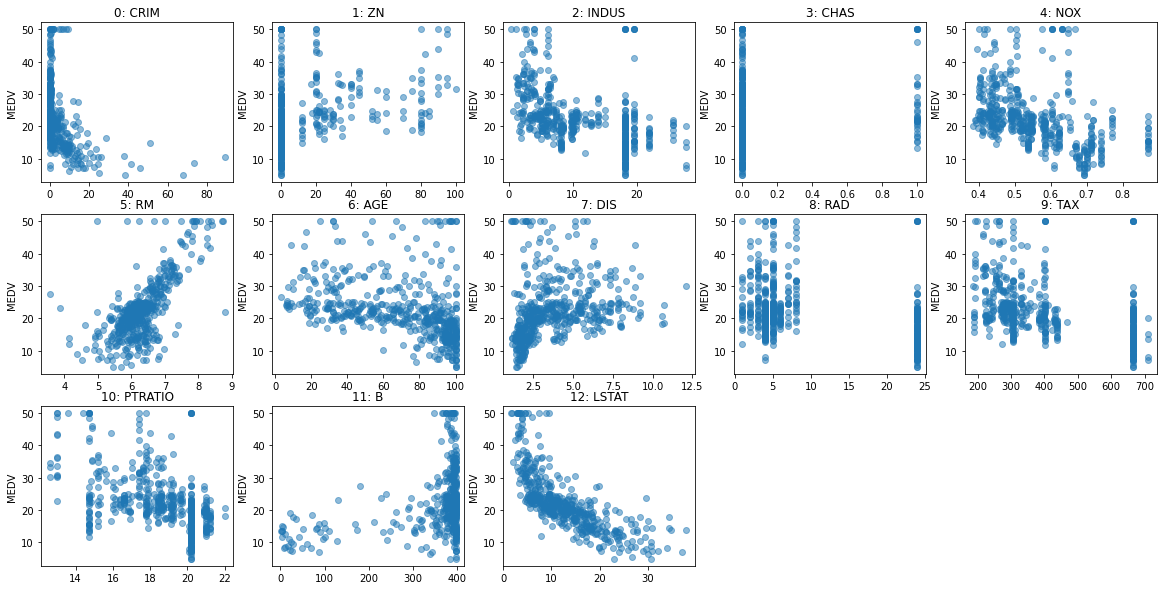

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [9]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7160133196648382

# Improve linear regression by adding regularization
- Ridge: l2 regularization
- Lasso: l1 regularization

In [12]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.7140510045941365

In [13]:
np.mean(cross_val_score(Lasso(), X_train, y_train, cv=10))

0.6688644278220217

# Adding grid search for regularization parameter

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)} 
# np.logspace(start,end,num) with default base=10
print(param_grid)

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}


In [15]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

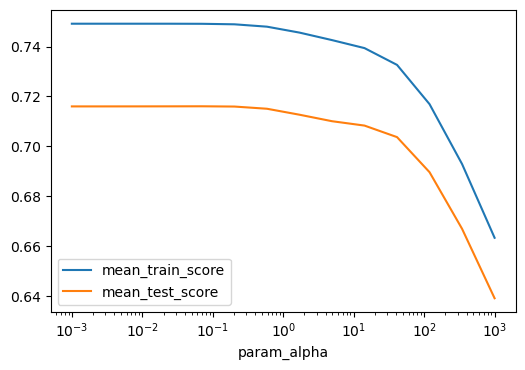

In [16]:
import pandas as pd
plt.figure(dpi=100)
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
# gca - get current ax
plt.legend()
plt.xscale("log")

In [17]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.07017038286703829}
0.716065070315815


In [18]:
np.mean(cross_val_score(Ridge(alpha=0.07017038286703829), X_train, y_train, cv=10))

0.716065070315815

In [19]:
#results

# Add preprocessing to further improve performance

In [20]:
from sklearn.preprocessing import PolynomialFeatures, scale

X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [21]:
print(X.shape)
print(X_poly.shape)

(506, 13)
(506, 104)


In [22]:
scale(X) 
# a quick way to normalize each column of X to Norm(0,1)
# more detailed info, please check https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [23]:
np.mean(cross_val_score(LinearRegression(),X_train, y_train, cv=10))

0.8065483746792733

In [24]:
np.mean(cross_val_score(Ridge(),X_train, y_train, cv=10))

0.822709961341871

In [25]:
np.mean(cross_val_score(Lasso(),X_train, y_train, cv=10))

0.7481300132523948

In [26]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

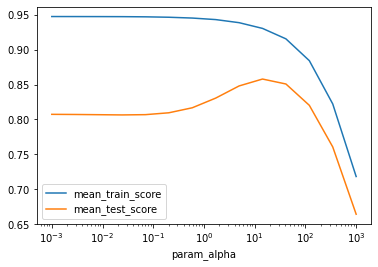

In [27]:
results = pd.DataFrame(grid.cv_results_)

results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()
plt.xscale("log")

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 14.251026703029993}
0.8578415451523969


# Visualize Coefficients

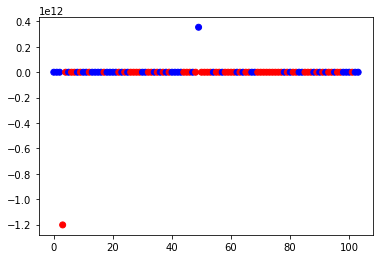

In [29]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")

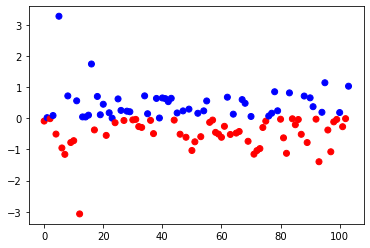

In [30]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")

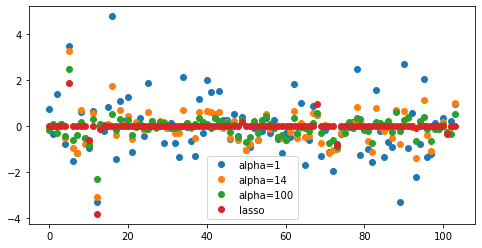

In [31]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.plot(lasso.coef_, 'o', label='lasso') # default alpha=1
#plt.plot(lr.coef_, 'o', label='linear regr')
plt.legend()

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.78
Test set score: 0.72
Number of features used: 9


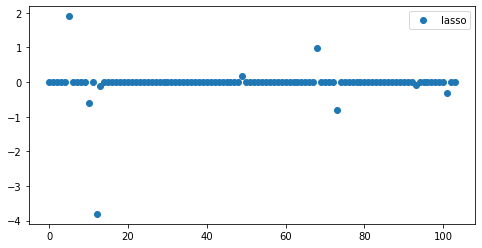

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(lasso.coef_, 'o', label='lasso') # default alpha=1
plt.legend()